In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
class PrintEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']}")

In [4]:
df = pd.read_excel('RJ_Reconstrucao_Carangidae_2024_08_07.xlsx')

Desagregação Xarelete_art e Xarelete_ind nos anos de 1962–1964, 1966–1971 e 1976–1977.

In [5]:
x1 = df[['Ano', 'Xarelete_art', 'Xarelete_ind']]

x1= pd.DataFrame(x1, columns= ['Ano', 'Xarelete_art', 'Xarelete_ind'])

print(x1)

     Ano  Xarelete_art  Xarelete_ind
0   1950           NaN           NaN
1   1951           NaN           NaN
2   1952           NaN           NaN
3   1953           NaN           NaN
4   1954           NaN           NaN
..   ...           ...           ...
68  2018      74.72815     1631.2248
69  2019      74.27050     2075.3352
70  2020      79.14280     1763.2538
71  2021      77.22128     2572.3550
72  2022      61.21620     2374.7366

[73 rows x 3 columns]


In [6]:
x1['Soma'] = x1['Xarelete_art'] + x1['Xarelete_ind']

print(x1)

     Ano  Xarelete_art  Xarelete_ind        Soma
0   1950           NaN           NaN         NaN
1   1951           NaN           NaN         NaN
2   1952           NaN           NaN         NaN
3   1953           NaN           NaN         NaN
4   1954           NaN           NaN         NaN
..   ...           ...           ...         ...
68  2018      74.72815     1631.2248  1705.95295
69  2019      74.27050     2075.3352  2149.60570
70  2020      79.14280     1763.2538  1842.39660
71  2021      77.22128     2572.3550  2649.57628
72  2022      61.21620     2374.7366  2435.95280

[73 rows x 4 columns]


In [7]:
x1['Pro_art'] = x1['Xarelete_art'].fillna(0)/x1['Soma'].fillna(0)
x1['Pro_ind'] =  x1['Xarelete_ind'].fillna(0) /x1['Soma'].fillna(0)
print(x1)
x1.to_excel('Xarelete_prop.xlsx', index=False)

     Ano  Xarelete_art  Xarelete_ind        Soma   Pro_art   Pro_ind
0   1950           NaN           NaN         NaN       NaN       NaN
1   1951           NaN           NaN         NaN       NaN       NaN
2   1952           NaN           NaN         NaN       NaN       NaN
3   1953           NaN           NaN         NaN       NaN       NaN
4   1954           NaN           NaN         NaN       NaN       NaN
..   ...           ...           ...         ...       ...       ...
68  2018      74.72815     1631.2248  1705.95295  0.043804  0.956196
69  2019      74.27050     2075.3352  2149.60570  0.034551  0.965449
70  2020      79.14280     1763.2538  1842.39660  0.042956  0.957044
71  2021      77.22128     2572.3550  2649.57628  0.029145  0.970855
72  2022      61.21620     2374.7366  2435.95280  0.025130  0.974870

[73 rows x 6 columns]


In [14]:
x1=pd.read_excel('propor\Xarelete_prop.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:1: SyntaxWarning: invalid escape sequence '\X'
C:\Users\Renan\AppData\Local\Temp\ipykernel_8968\658424212.py:1: SyntaxWarning: invalid escape sequence '\X'
  x1=pd.read_excel('propor\Xarelete_prop.xlsx')


In [27]:
x0 = x1[['Ano', 'Pro_art']].dropna().values


df_x0= pd.DataFrame(x0, columns= ['Ano', 'Pro_art'])


x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Pro_art'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

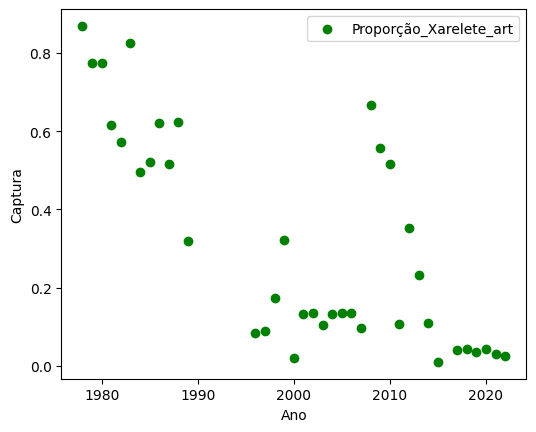

In [28]:
plt.figure(figsize=(6, 4.8))
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='Proporção_Xarelete_art')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.24778203666210175
Epoch 200: loss = 0.13692335784435272
Epoch 300: loss = 0.07536773383617401
Epoch 400: loss = 0.07487323135137558
Epoch 500: loss = 0.07518864423036575
Epoch 600: loss = 0.07396388798952103
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


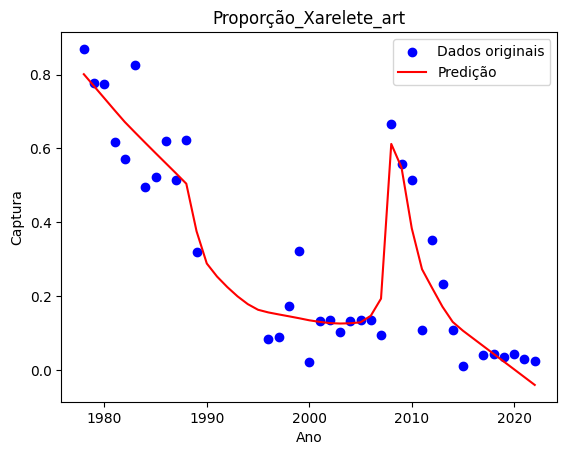

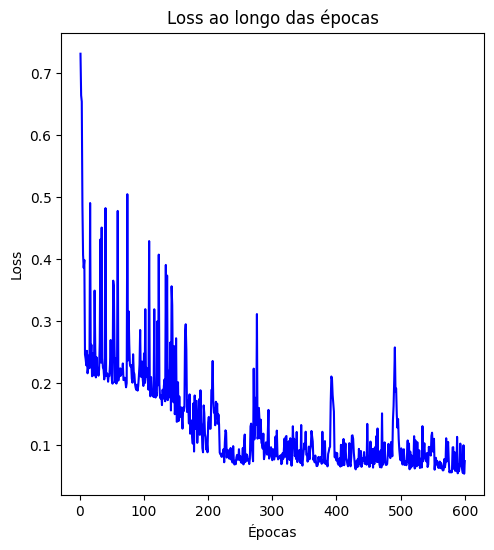

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=600, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
#model.save_weights('d:/reconstrucao_estatistica_pesqueira/reconstrucao_estatistica_brasileira/RE/Reconstru--o/PESOS/.weights.h5', overwrite=True)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Proporção_Xarelete_art')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predição para o ano 1962: 1.0
Predição para o ano 1963: 1.0
Predição para o ano 1964: 1.0
Predição para o ano 1966: 1.0
Predição para o ano 1967: 1.0
Predição para o ano 1968: 1.0
Predição para o ano 1969: 1.0
Predição para o ano 1970: 1.0
Predição para o ano 1971: 0.9819130301475525
Predição para o ano 1976: 0.8564937710762024
Predição para o ano 1977: 0.830210268497467


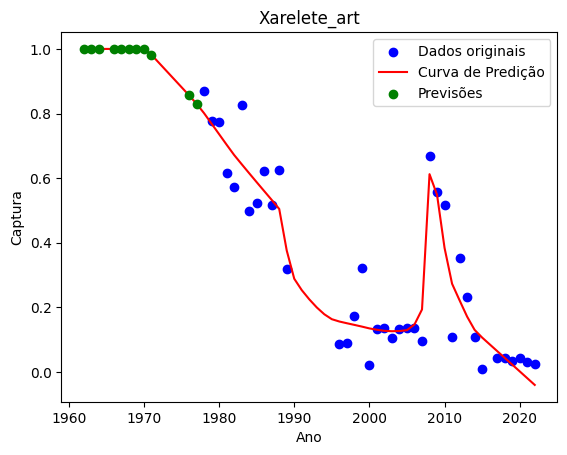

In [37]:
anos_para_prever = np.array([1962, 1963, 1964, 1966, 1967, 1968, 1969, 1970, 1971, 1976, 1977]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean
predicoes = np.minimum(predicoes, 1.0)

for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Xarelete_art')
plt.legend()
plt.show()


In [40]:
df_combined.to_excel('Proporcao_Xarelete_art_.xlsx', index=False)

Xareu_art_ind: Desagregar 1962–1963 e 1976–1977 em Xareu_art e Xareu_ind

In [ ]:
df = pd.read_excel('RJ_Reconstrucao_Carangidae_2024_08_07.xlsx')

In [41]:
x1 = df[['Ano', 'Xareu_art', 'Xareu_ind']]

x1= pd.DataFrame(x1, columns= ['Ano', 'Xareu_art', 'Xareu_ind'])

print(x1)

     Ano  Xareu_art  Xareu_ind
0   1950        NaN        NaN
1   1951        NaN        NaN
2   1952        NaN        NaN
3   1953        NaN        NaN
4   1954        NaN        NaN
..   ...        ...        ...
68  2018     3.6820    35.7880
69  2019     5.8743    90.3398
70  2020     2.0100    74.9300
71  2021     4.8530    51.6660
72  2022     2.6695     8.0130

[73 rows x 3 columns]


In [42]:
x1['Soma'] = x1['Xareu_art'] + x1['Xareu_ind']

print(x1)

     Ano  Xareu_art  Xareu_ind     Soma
0   1950        NaN        NaN      NaN
1   1951        NaN        NaN      NaN
2   1952        NaN        NaN      NaN
3   1953        NaN        NaN      NaN
4   1954        NaN        NaN      NaN
..   ...        ...        ...      ...
68  2018     3.6820    35.7880  39.4700
69  2019     5.8743    90.3398  96.2141
70  2020     2.0100    74.9300  76.9400
71  2021     4.8530    51.6660  56.5190
72  2022     2.6695     8.0130  10.6825

[73 rows x 4 columns]


In [43]:
x1['Pro_art'] = x1['Xareu_art'].fillna(0)/x1['Soma'].fillna(0)
x1['Pro_ind'] =  x1['Xareu_ind'].fillna(0) /x1['Soma'].fillna(0)
print(x1)
x1.to_excel('Xareu_prop.xlsx', index=False)

     Ano  Xareu_art  Xareu_ind     Soma   Pro_art   Pro_ind
0   1950        NaN        NaN      NaN       NaN       NaN
1   1951        NaN        NaN      NaN       NaN       NaN
2   1952        NaN        NaN      NaN       NaN       NaN
3   1953        NaN        NaN      NaN       NaN       NaN
4   1954        NaN        NaN      NaN       NaN       NaN
..   ...        ...        ...      ...       ...       ...
68  2018     3.6820    35.7880  39.4700  0.093286  0.906714
69  2019     5.8743    90.3398  96.2141  0.061054  0.938946
70  2020     2.0100    74.9300  76.9400  0.026124  0.973876
71  2021     4.8530    51.6660  56.5190  0.085865  0.914135
72  2022     2.6695     8.0130  10.6825  0.249895  0.750105

[73 rows x 6 columns]


In [60]:
x1=pd.read_excel('propor\Xareu_prop.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:1: SyntaxWarning: invalid escape sequence '\X'
C:\Users\Renan\AppData\Local\Temp\ipykernel_8968\1961264230.py:1: SyntaxWarning: invalid escape sequence '\X'
  x1=pd.read_excel('propor\Xareu_prop.xlsx')


In [62]:
x0 = x1[['Ano', 'Pro_art']].dropna().values


df_x0= pd.DataFrame(x0, columns= ['Ano', 'Pro_art'])


x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Pro_art'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

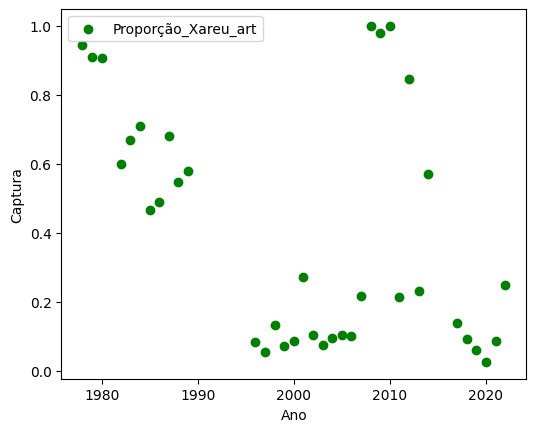

In [64]:
plt.figure(figsize=(6, 4.8))
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='Proporção_Xareu_art')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.24436140060424805
Epoch 200: loss = 0.12189138680696487
Epoch 300: loss = 0.10874895006418228
Epoch 400: loss = 0.0888727456331253
Epoch 500: loss = 0.0836801528930664
Epoch 600: loss = 0.07144339382648468
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


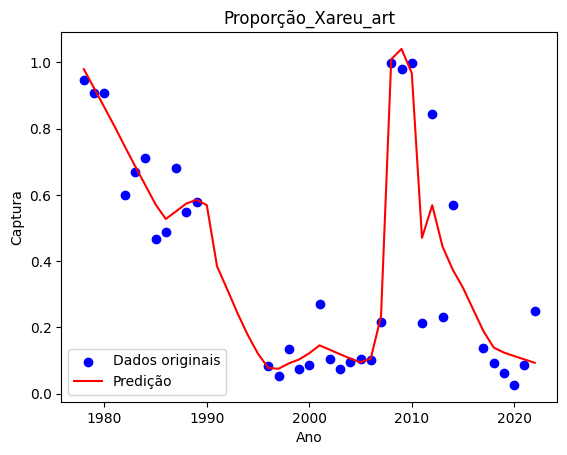

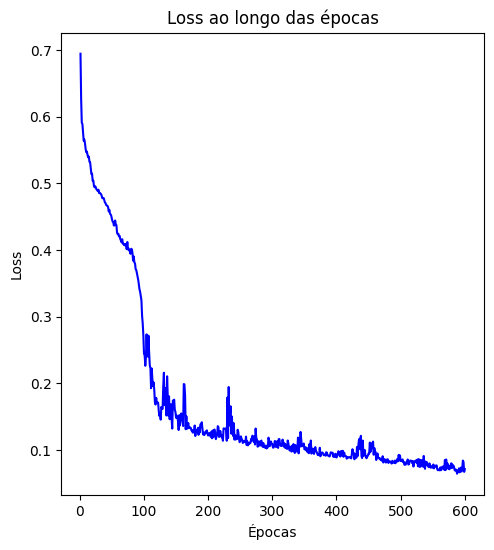

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=600, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
#model.save_weights('d:/reconstrucao_estatistica_pesqueira/reconstrucao_estatistica_brasileira/RE/Reconstru--o/PESOS/.weights.h5', overwrite=True)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Proporção_Xareu_art')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predição para o ano 1962: 1.0
Predição para o ano 1963: 1.0
Predição para o ano 1976: 1.0
Predição para o ano 1977: 1.0


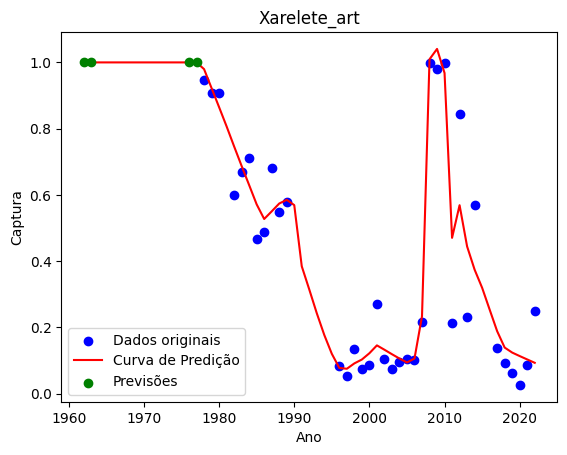

In [67]:
anos_para_prever = np.array([1962, 1963, 1976, 1977]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean
predicoes = np.minimum(predicoes, 1.0)

for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Xarelete_art')
plt.legend()
plt.show()


In [68]:
df_combined.to_excel('Proporcao_Xareu_art_.xlsx', index=False)